<a href="https://colab.research.google.com/github/kwasicode/Artificial-Intelligence/blob/main/Optimization_of_cant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.6 MB/s eta 0:00:00


gen	nevals
0  	50    
1  	45    
2  	48    
3  	44    
4  	44    
5  	49    
6  	46    
7  	41    
8  	47    
9  	48    
10 	48    
11 	46    
12 	44    
13 	41    
14 	44    
15 	45    
16 	45    
17 	47    
18 	44    
19 	47    
20 	45    
21 	45    
22 	47    
23 	45    
24 	46    
25 	40    
26 	42    
27 	43    
28 	45    
29 	46    
30 	44    
31 	43    
32 	47    
33 	47    
34 	45    
35 	44    
36 	45    
37 	46    
38 	45    
39 	46    
40 	44    
41 	46    
42 	47    
43 	44    
44 	43    
45 	45    
46 	47    
47 	46    
48 	46    
49 	42    
50 	46    
51 	45    
52 	45    
53 	45    
54 	47    
55 	44    
56 	46    
57 	47    
58 	43    
59 	46    
60 	41    
61 	41    
62 	43    
63 	41    
64 	43    
65 	46    
66 	43    
67 	46    
68 	41    
69 	44    
70 	43    
71 	43    
72 	48    
73 	46    
74 	45    
75 	47    
76 	46    
77 	48    
78 	46    
79 	46    
80 	43    
81 	43    
82 	44    
83 	46    
84 	48    
85 	44    
86 	46    
87 	42    
88 	43    
89 	42    

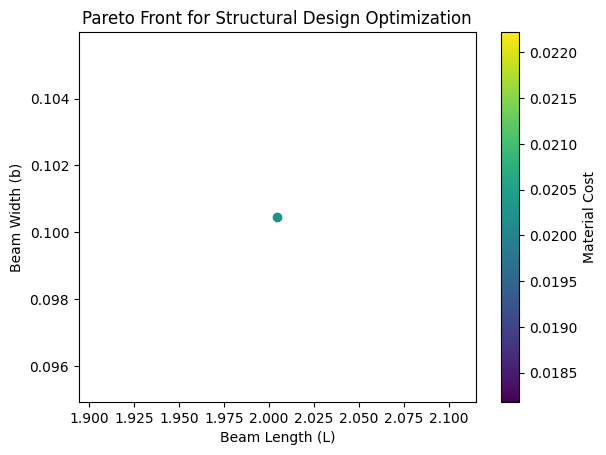

In [3]:
import random
from deap import base, creator, tools, algorithms
import matplotlib.pyplot as plt

# Given values for the optimization problem
sigma_limit = 120.0  # MPa
delta_max = 10.0  # mm
L_min = 2.0  # meters
b_min = 0.1  # meters
h_min = 0.1  # meters

# Objective Function: Material Cost
def objective_function(L, b, h):
    # Assuming a simple cost model proportional to volume
    volume = L * b * h
    return volume

# Constraints
def safety_constraint(sigma, sigma_limit):
    return sigma <= sigma_limit

def performance_constraint(delta, delta_max):
    return delta <= delta_max

def geometric_constraints(L, b, h, L_min, b_min, h_min):
    return L >= L_min and b >= b_min and h >= h_min

# Define the optimization problem as a minimization problem
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

# Define the genetic algorithm operators
toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, 0.1, 10.0)  # Decision variable bounds
toolbox.register("individual", tools.initCycle, creator.Individual, (toolbox.attr_float,) * 3, n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Define evaluation function
def evaluate(individual):
    L, b, h = individual
    # Calculate material cost (objective function)
    cost = objective_function(L, b, h)

    # Dummy values for stress and deflection (replace with actual structural analysis)
    sigma = random.uniform(80, 150)  # MPa
    delta = random.uniform(5, 15)  # mm

    # Check constraints
    safety_constraint_satisfied = safety_constraint(sigma, sigma_limit)
    performance_constraint_satisfied = performance_constraint(delta, delta_max)
    geometric_constraints_satisfied = geometric_constraints(L, b, h, L_min, b_min, h_min)

    # Combine constraints
    constraints_satisfied = safety_constraint_satisfied and performance_constraint_satisfied and geometric_constraints_satisfied

    # Return a tuple (cost, ) if constraints are satisfied, else return a high value
    return (cost, ) if constraints_satisfied else (float('inf'),)

toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selNSGA2)

# Define genetic algorithm parameters
pop_size = 50
ngen = 100
cxpb = 0.7
mutpb = 0.2

# Create an initial population
population = toolbox.population(n=pop_size)

# Run the genetic algorithm
algorithms.eaMuPlusLambda(population, toolbox, mu=pop_size, lambda_=pop_size, cxpb=cxpb, mutpb=mutpb, ngen=ngen, stats=None, halloffame=None, verbose=True)

# Extract the Pareto front from the final population
pareto_front = tools.sortNondominated(population, len(population), first_front_only=True)[0]

# Extract decision variables and objective values for the Pareto front
pareto_front_vars = [indiv[0:3] for indiv in pareto_front]
pareto_front_costs = [indiv.fitness.values[0] for indiv in pareto_front]

# Plot the Pareto front
plt.scatter([ind[0] for ind in pareto_front_vars], [ind[1] for ind in pareto_front_vars], c=pareto_front_costs, cmap=plt.cm.viridis)
plt.xlabel('Beam Length (L)')
plt.ylabel('Beam Width (b)')
plt.title('Pareto Front for Structural Design Optimization')
plt.colorbar(label='Material Cost')
plt.show()


In [4]:
# Given values for structural analysis (arbitrary placeholders)
load = 1000  # N
E = 2.1e11  # Pa (Young's Modulus for steel)

In [6]:
# Modify the evaluate function to include stress and deflection
def evaluate(individual):
    L, b, h = individual

    # Calculate material cost (objective function)
    cost = objective_function(L, b, h)

    # Calculate stress and deflection
    sigma, delta = calculate_stress_and_deflection(L, b, h, load=load)

    # Check constraints
    safety_constraint_satisfied = safety_constraint(sigma, sigma_limit)
    performance_constraint_satisfied = performance_constraint(delta, delta_max)
    geometric_constraints_satisfied = geometric_constraints(L, b, h, L_min, b_min, h_min)

    # Combine constraints
    constraints_satisfied = safety_constraint_satisfied and performance_constraint_satisfied and geometric_constraints_satisfied

    # Return a tuple (cost, ) if constraints are satisfied, else return a high value
    return (cost, ) if constraints_satisfied else (float('inf'),)


In [9]:
# Assuming a cantilever beam with a point load at the free end
def calculate_stress_and_deflection(L, b, h, load):
    # Assume a simple rectangular cross-section
    I = (1/12) * b * h**3
    c = h / 2  # For a rectangular cross-section, c is half of the height

    # Calculate the bending moment
    M = load * L

    # Calculate stress
    sigma = (M * c) / I

    # Calculate deflection
    delta = (load * L**3) / (3 * E * I)

    return sigma, delta


In [10]:
# Extract the best individual from the Pareto front
best_solution = pareto_front[0]

# Extract decision variables
best_solution_vars = best_solution[0:3]

# Calculate stress and deflection for the best solution
best_sigma, best_delta = calculate_stress_and_deflection(best_solution_vars[0], best_solution_vars[1], best_solution_vars[2], load=load)

# Print the results
print("Optimal Beam Dimensions:")
print(f"Length (L): {best_solution_vars[0]} meters")
print(f"Width (b): {best_solution_vars[1]} meters")
print(f"Height (h): {best_solution_vars[2]} meters")
print("\nStructural Analysis Results:")
print(f"Stress (σ): {best_sigma} MPa")
print(f"Deflection (δ): {best_delta} mm")
print("\nMaterial Cost:")
print(f"Material Cost: {best_solution.fitness.values[0]}")


Optimal Beam Dimensions:
Length (L): 2.0001111926978457 meters
Width (b): 0.10008516691310161 meters
Height (h): 0.1002728037263838 meters

Structural Analysis Results:
Stress (σ): 11925301.173287537 MPa
Deflection (δ): 0.0015103719938782114 mm

Material Cost:
Material Cost: 0.020072756505533605
